In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from google.colab import drive
import os

# Monte o Google Drive
drive.mount('/content/drive')

# Liste os arquivos e diretórios na pasta MyDrive
print(os.listdir('/content/drive/MyDrive/'))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Colab Notebooks', 'TensorFLow', 'train', 'Copy of Construindo um Modelo com Tensorflow.ipynb']


In [6]:
# Verifique o conteúdo da pasta TensorFLow
print(os.listdir('/content/drive/MyDrive/TensorFLow/'))

['train', 'test1']


In [7]:
# Verifique o conteúdo da pasta train
print(os.listdir('/content/drive/MyDrive/TensorFLow/train/'))

['dogs', 'cats']


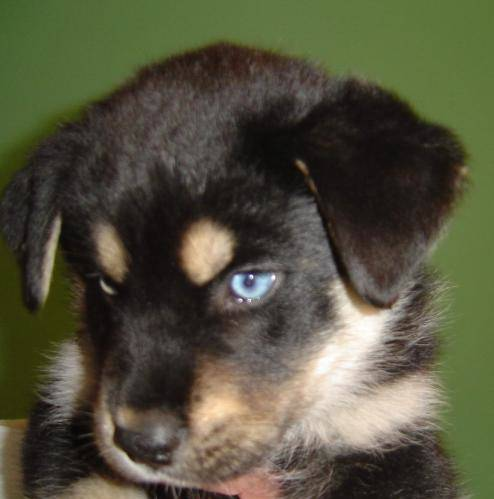

In [8]:
from IPython.display import Image
Image(filename = '/content/drive/MyDrive/TensorFLow/train/dogs/dog.998.jpg')

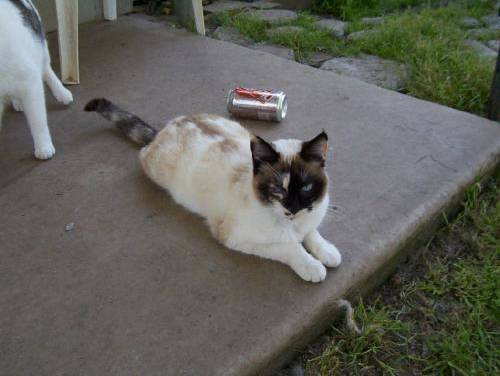

In [10]:
Image(filename = '/content/drive/MyDrive/TensorFLow/train/cats/cat.1195.jpg')

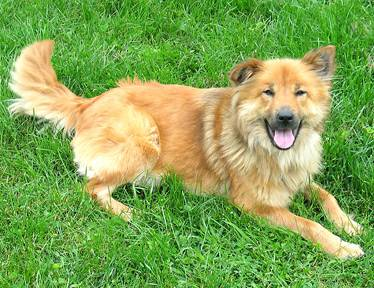

In [12]:
Image(filename = '/content/drive/MyDrive/TensorFLow/test1/test1/4.jpg')

Construindo a Rede Neural Convolucional

In [13]:
import tensorflow as tf

In [14]:
import keras as K

In [15]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [16]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [17]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Pré-processamento



In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [31]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/TensorFLow/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 910 images belonging to 2 classes.


Treinamento do Modelo



In [32]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=5,
               epochs=25)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 61s 7s/step - accuracy: 0.6539 - loss: 0.6360
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6518 - loss: 0.6360
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6387 - loss: 0.6474
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7308 - loss: 0.5836
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 332ms/step - accuracy: 0.7155 - loss: 0.6595
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5877 - loss: 0.6917 
Epoch 7/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.7323 - loss: 0.5436
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 721ms/step - accuracy: 0.7021 - loss: 0.5855
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 772ms/step - accuracy: 0.6731 - loss: 0.6035
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 781ms/step - accuracy: 0.7168 - loss: 0.5637
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 298ms/step - accuracy: 0.7034 - loss: 0.5609
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.6667 - loss: 0.6138
Epoch 13/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 699ms/step - accuracy: 0.6938 - loss: 0.5776
Epoch 14/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 360ms/step - accuracy: 0.7043 - loss: 0.5396
Epoch 15/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 487ms/step - accuracy: 0.6594 - loss: 0.5955
Epoch 16/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 521ms/step - accuracy: 0.7298 - loss: 0.5841
Epoch 17/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step - accuracy: 0.7161 - loss: 0.5764
Epoch 18/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.6427 - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


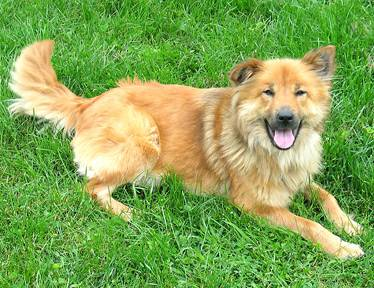

In [37]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img('/content/drive/MyDrive/TensorFLow/test1/test1/4.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] >= 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename='/content/drive/MyDrive/TensorFLow/test1/test1/4.jpg')

